# Introductory Machine Learning Pipeline

Regression tasks are tasks where the ultimate goal of the model is to return a numeric value by making a prediction. 

**Objective:** As an example, in this case we will do a regression to calculate the covid cases that will occur in future weeks based on the data of past weeks and the current week.

**Pipeline:** As a pipeline for machine learning tasks, we will be following the instructions based on <a href="https://www.ibm.com/docs/es/spss-modeler/saas?topic=dm-crisp-help-overview">CRISP-DM</a> methodology:

<img src="https://www.ibm.com/docs/es/SS3RA7_sub/modeler_crispdm_ddita/clementine/images/crisp_process.jpg" alt="Crisp dm methodology" width="250"/>


1. **Business Understanding**: First, we must understand that data science and therefore machine learning are techniques that require an understanding of the problem and the formation of multidisciplinary teams. That is why this initial phase is crucial for the success of any project in data science. In this phase we will be in charge of obtaining all the possible information about the project, this implies:

- Domain of the problem
- Related works
- Business objectives
- Possible data sources
- Success criteria of the project
- Possible solutions and techniques

2. **Data Understanding**: The second phase is the data understanding phase. In this phase we will assume that we have already passed through the data collection stage. In this phase we will take care of understanding the data we have available and its possible use to solve the problem. In this phase, the data is:
- Analyzed by visualizing the dataset, shape, variables, ...
- Genearating different statistics from the dataset, like mean, min, max, sd
- And generating plots from the datasets.

3. **Data Preparation**: Once we have analyzed the data, we know what the strengths and weaknesses of the dataset are, therefore we must move on to a data preparation phase, which consists of:
- Data cleaning
- Variable selection
- Format changes
- Data imputation

4. **Modeling**: The modeling stage consists of the generation of multiple machine learning and statistical models designed to solve the specific task using the data collected in the previous phases. In this phase, the models are also evaluated by testing the models generated under a previously defined metric and it is seen which model has the best performance.

5. **Evaluation**: Once the modeling phase has been completed, starts the evaluation phase, where unlike the previous phase, not only the model is evaluated, but also the business objectives defined in the first phase and if the models generated truth fulfills the objective of the project.

**Note**: The phases of this methodology are not static, once a phase is completed you can come back to that phase again if it's necessary. Follow the rows of the previous image as reference. 

# 1. Business Understanding

The pandemic caused by covid-19 has shown that both governments and health institutions are not prepared for a health crisis on the level of the pandemic caused by covid-19.

However, the crisis has also brought different solutions and ways to deal with the pandemic using data science and machine learning techniques. Some examples of this is the creation of early warning systems that help health entities to propose strategies for the preparation and management of the pandemic and hospital resources.

For the creation of these models, many types of data and models can be used, such as autoregressive models that use data from the same disease in past days or weeks to predict future behavior, for which they can be used from traditional statistical techniques of analysis of time series (such as ARIMA or SARIMA), machine learning techniques using regression models (such as linear regression, random forest, Support Vector Regressor (SVR), etc.) or more advanced techniques such as deep learning for sequence analysis (Recurrent Neural Networks , Long-Short Termn-Memory (LSTM), Transformers, among others) [<a href="https://link.springer.com/article/10.1007/s13204-021-01868-7">1</a>, <a href="https://link.springer.com/article/10.1007/s42979-021-00774-7">2</a>].

Likewise, the possibility of using various data sources that can help in the construction of these models, making use of data such as those obtained by public and open sources such as newspapers, news, Google searches, among others, have proven to be effective in disease prediction [<a href="https://arxiv.org/abs/2004.04019">3</a>].

### Setup enviorment

In [ ]:
# Data reading in Dataframe format and data preprocessing
import pandas as pd
from pandas import read_csv
from pandas import DataFrame
from pandas import concat


# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Linear algebra operations
import numpy as np

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#connect with drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/TIC en Salud/Week 3 - Data Analysis
!ls

/content/drive/MyDrive/TIC en Salud/Week 3 - Data Analysis
Crisp-dm_Covid.ipynb		ejemplo.png	  read_data.ipynb
Data				Graph_data.ipynb
Data_Understanding_covid.ipynb	Homework.ipynb


In [ ]:
main_path = 'Data/'

# 2. Data Understanding

In this practice we will be using 2 datasets:

1. COVID-19 Cases in latam
2. COVID-19 mentions in news from Media Cloud

### For both datasets we will do the following:

1. Analyzing the original dataset (shape, variables, etc.)
2. Genearating different statistics from the dataset (mean, min, max, sd)
3. Data visualization using some plots.

In [ ]:
""" 
This function checks if there are null values in the dataframe:
In case of not having null values, print: 'There aren't null values in the dataframe'
In case of having null values, print the columns with these values
"""
def null_values(df):
    nulos = df.isna().sum().any()
    if nulos == False:
        print("There aren't null values in the dataframe")
    else:
        print(df.isna().sum()[df.isna().sum() == True])

### 2.1 COVID-19 Cases in latam

We can see that the file _"daily_covid_cases_latam.csv"_ has:

Columns:
- Location: Name of the country where covid-19 cases occured
- Dates from 2020-02-23 to 2022-05-26: Number of covid-19 cases in that day in that in each country

Rows:
- Each row is a different country

In [ ]:
# Path to file
file_path = main_path + 'COVID_LATAM/daily_covid_cases_latam.csv'
#file_path = '/content/drive/MyDrive/TIC en Salud/Week 3 - Data Analysis/Data/COVID_LATAM/daily_covid_cases_latam.csv'

# Read file
covid_cases_latam = pd.read_csv(file_path)

# Check if there are null values
null_values(covid_cases_latam)

# Print first 5 rows
covid_cases_latam.head()

There aren't null values in the dataframe


,location,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,2020-03-02,...,2022-05-17,2022-05-18,2022-05-19,2022-05-20,2022-05-21,2022-05-22,2022-05-23,2022-05-24,2022-05-25,2022-05-26
0,Antigua and Barbuda,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,607.730,557.086,0.000,324.123,0.000,405.154,0.000,810.307,577.344
1,Argentina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,953.541,0.000,0.000,0.000,0.000
2,Bahamas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,80.622,55.428,123.452,221.710,161.244,156.205,73.064,131.011,0.000,317.449
3,Barbados,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1630.125,1400.726,1289.502,1077.481,0.000,1637.076,451.847,1160.899,851.558,806.373
4,Belize,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,264.253,197.572,288.950,214.860,0.000,0.000,488.992,325.994,306.237,187.694


In [ ]:
# Check data types
covid_cases_latam.dtypes

location       object
2020-02-23    float64
2020-02-24    float64
2020-02-25    float64
2020-02-26    float64
               ...   
2022-05-22    float64
2022-05-23    float64
2022-05-24    float64
2022-05-25    float64
2022-05-26    float64
Length: 825, dtype: object

In [ ]:
# Describe the dataset
covid_cases_latam.describe()

,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,2020-03-02,2020-03-03,...,2022-05-17,2022-05-18,2022-05-19,2022-05-20,2022-05-21,2022-05-22,2022-05-23,2022-05-24,2022-05-25,2022-05-26
count,32.000000,32.0,32.0,32.000000,32.0,32.000000,32.000000,32.000000,32.0,32.000000,...,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,0.003250,0.0,0.0,0.000156,0.0,0.000250,0.000875,0.024938,0.0,0.004063,...,250.273531,281.243375,208.875125,158.458031,64.220562,174.703156,371.740000,348.417969,365.373031,156.078937
std,0.018385,0.0,0.0,0.000884,0.0,0.001414,0.004133,0.086726,0.0,0.013673,...,563.174421,561.821531,359.397654,269.361214,158.757000,356.878452,1549.621268,661.917481,1072.473840,251.322430
min,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,7.483500,1.045000,29.356000,13.097000,0.000000,3.285000,5.546000,36.451500,19.141500,31.611500
75%,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,157.281000,215.024000,307.006000,216.572500,13.788000,178.612750,109.775500,317.413250,276.969000,154.770500
max,0.104000,0.0,0.0,0.005000,0.0,0.008000,0.023000,0.364000,0.0,0.056000,...,2406.760000,2212.275000,1289.502000,1077.481000,731.014000,1637.076000,8812.282000,2627.916000,5985.701000,901.729000


## 2.2 COVID-19 mentions in news from Media Cloud

We can see that the file _"covid-19_attention_latam.csv"_ has:

Columns:

- date: Dates from 2020-01-01 to 2022-06-01 when the mentions of covid-19 occured
- count_Country Name: Represents the number of news media mentioning our topic.
- total_count_Country Name: Is the total number of news media published.
- ratio_Country Name: Indicates the proportion of news media that contain the word we are interested in.

Rows:
- Each row is a different date

In [ ]:
# Path to file
file_path = main_path + 'Media Cloud/covid-19_attention_latam.csv'

# Read file
covid_media_cloud_latam = pd.read_csv(file_path)

# Convert date to datetime datatype
covid_media_cloud_latam.date = pd.to_datetime(covid_media_cloud_latam.date)

# Check if there are null values
null_values(covid_media_cloud_latam)

# Print first 5 rows
covid_media_cloud_latam.head()

There aren't null values in the dataframe


,date,count_Antigua and Barbuda,total_count_Antigua and Barbuda,ratio_Antigua and Barbuda,count_Argentina,total_count_Argentina,ratio_Argentina,count_Bahamas,total_count_Bahamas,ratio_Bahamas,...,ratio_Suriname,count_Trinidad and Tobago,total_count_Trinidad and Tobago,ratio_Trinidad and Tobago,count_Uruguay,total_count_Uruguay,ratio_Uruguay,count_Venezuela,total_count_Venezuela,ratio_Venezuela
0,2020-01-01,0,3,0.000,180,2699,0.066691,0,12,0.000000,...,0.058824,2,25,0.080000,9,158,0.056962,9,464,0.019397
1,2020-01-02,0,6,0.000,528,6319,0.083558,0,51,0.000000,...,0.000000,0,28,0.000000,17,314,0.054140,45,678,0.066372
2,2020-01-03,1,10,0.100,465,7209,0.064503,3,60,0.050000,...,0.240000,4,29,0.137931,24,363,0.066116,45,897,0.050167
3,2020-01-04,0,7,0.000,268,3805,0.070434,1,39,0.025641,...,0.142857,1,14,0.071429,18,192,0.093750,18,659,0.027314
4,2020-01-05,1,8,0.125,292,3771,0.077433,2,34,0.058824,...,0.222222,3,27,0.111111,18,203,0.088670,31,773,0.040103


In [ ]:
# Check data types
covid_media_cloud_latam.dtypes

date                               datetime64[ns]
count_Antigua and Barbuda                   int64
total_count_Antigua and Barbuda             int64
ratio_Antigua and Barbuda                 float64
count_Argentina                             int64
                                        ...      
total_count_Uruguay                         int64
ratio_Uruguay                             float64
count_Venezuela                             int64
total_count_Venezuela                       int64
ratio_Venezuela                           float64
Length: 97, dtype: object

In [ ]:
# Describe the dataset
covid_media_cloud_latam.describe()

,count_Antigua and Barbuda,total_count_Antigua and Barbuda,ratio_Antigua and Barbuda,count_Argentina,total_count_Argentina,ratio_Argentina,count_Bahamas,total_count_Bahamas,ratio_Bahamas,count_Barbados,...,ratio_Suriname,count_Trinidad and Tobago,total_count_Trinidad and Tobago,ratio_Trinidad and Tobago,count_Uruguay,total_count_Uruguay,ratio_Uruguay,count_Venezuela,total_count_Venezuela,ratio_Venezuela
count,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,...,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000
mean,8.817667,25.439411,0.332739,3163.884485,15558.562854,0.204927,26.937712,66.570781,0.388500,29.322763,...,0.272125,16.139298,78.983012,0.198213,115.952435,501.975085,0.232075,449.425821,1818.894677,0.252100
std,7.309457,17.955397,0.185969,1633.061302,7233.601749,0.067675,18.704334,35.920016,0.186629,15.676759,...,0.133356,10.318063,42.974848,0.099302,57.607791,197.927904,0.086026,234.978973,714.666883,0.128710
min,0.000000,0.000000,0.000000,23.000000,114.000000,0.047554,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,12.000000,0.214286,2151.000000,10711.500000,0.154281,10.000000,42.000000,0.259437,20.000000,...,0.189636,7.000000,42.000000,0.138525,82.000000,369.000000,0.174887,284.500000,1386.500000,0.167517
50%,7.000000,21.000000,0.333333,3203.000000,14681.000000,0.211622,25.000000,65.000000,0.393443,29.000000,...,0.260000,16.000000,79.000000,0.192771,115.000000,484.000000,0.228938,460.000000,1861.000000,0.248048
75%,13.000000,35.500000,0.444444,4311.500000,21503.500000,0.252008,40.000000,88.000000,0.520157,39.000000,...,0.347467,23.000000,109.500000,0.253745,150.000000,688.000000,0.291356,635.000000,2443.500000,0.323386
max,41.000000,87.000000,1.000000,9292.000000,29055.000000,0.413718,86.000000,224.000000,1.000000,82.000000,...,1.000000,49.000000,209.000000,1.000000,305.000000,857.000000,0.750000,1131.000000,3128.000000,1.000000


In [ ]:
"""
Function to show histograms of the ratio of 3 countries

1. You must pass the list of the names of the 3 countries as they appear in the dataset after ratio_ ...
Example:
ratio_Antigua and Barbuda -> Antigua and Barbuda
ratio_Argentina -> Argentina
ratio_Bahamas -> Bahamas

2. With those names you form a list like this:
-> countries = ['Antigua and Barbuda', 'Argentina', 'Bahamas']

3. You call the function like this:
where df is the dataframe with the country data
show_histograms(df, countries)

Optional:
you can change the color by putting a color between the parentheses, like this:
-> show_histograms(countries, color='#fcba03')

In this case the color is '#fcba03', but you can also use the name, like:
-> show_histograms(countries, color='Blue')
"""

def mostrar_histogramas(df, paises, color='#fcba03'):

    plt.gcf().set_size_inches(15, 8)
    plt.subplot(1, 3, 1)

    sns.distplot(df[f'ratio_{paises[0]}'], bins=20, color=color)
    plt.title(f'RSV  {paises[0]}')

    plt.subplot(1, 3, 2)
    sns.distplot(df[f'ratio_{paises[1]}'], bins=20, color=color)
    plt.title(f'RSV  {paises[1]}')

    plt.subplot(1, 3, 3)
    sns.distplot(df[f'ratio_{paises[2]}'], bins=20, color=color)
    plt.title(f'RSV  {paises[2]}')

    plt.show()

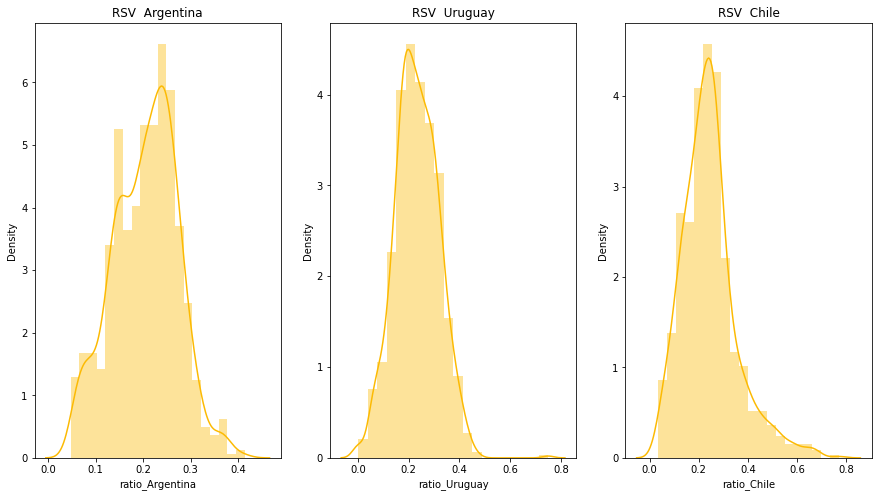

In [ ]:
# We use the function to show the ratio of Argentina, Uruguay and Chile
paises = ['Argentina', 'Uruguay', 'Chile']
# Call the function using the list
mostrar_histogramas(covid_media_cloud_latam, paises)

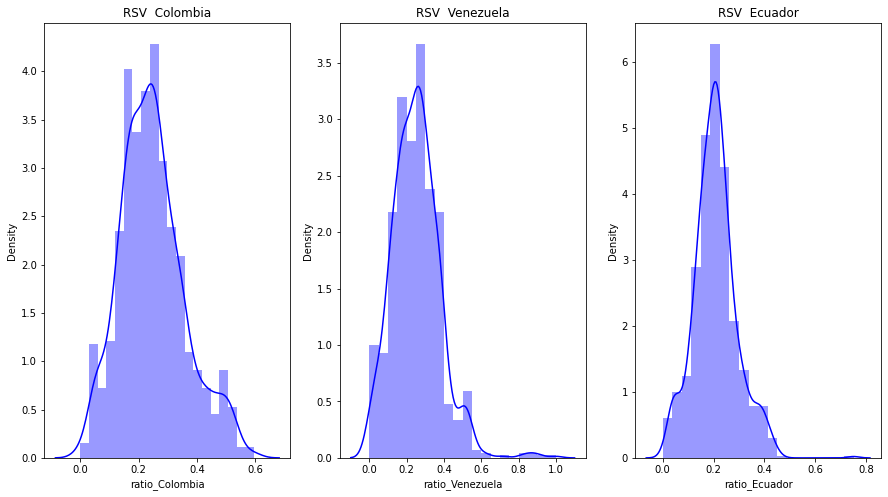

In [ ]:
paises = ['Colombia', 'Venezuela', 'Ecuador']
mostrar_histogramas(covid_media_cloud_latam, paises, color= 'Blue')